In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Radioactive decay

In [7]:
def N_exact(t, N_0, tau):
    return N_0*np.exp(-t/tau)

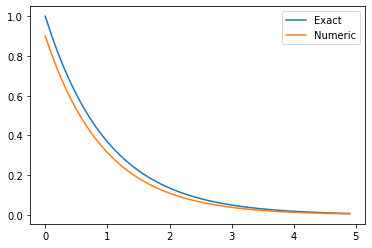

In [3]:
tau = 1
N_0 = 1 
delta_t = 0.1*tau
ts = np.arange(0, 5*tau, delta_t)
N_act = N_0
Ns_approx = list()
for t in ts:
    N_act = N_act - (1 /tau) * N_act * delta_t
    Ns_approx.append(N_act)
    
Ns_exact = N_exact(ts, N_0, tau)
    
plt.plot(ts, Ns_exact, label='Exact')
plt.plot(ts, Ns_approx, label='Numeric')
plt.legend()

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


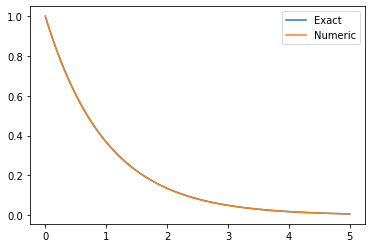

In [4]:
tau = 1
N_0 = 1 
delta_t = 0.00001 * tau
ts = np.arange(0, 5*tau, delta_t)
N_act = N_0
Ns = list()
for t in ts:
    N_act = N_act - (1 /tau) * N_act * delta_t
    Ns.append(N_act)
    
Ns_exact = N_exact(ts, N_0, tau)
    
plt.plot(ts, Ns_exact, label='Exact')
plt.plot(ts, Ns, label='Numeric')
plt.legend()

# Free fall

In [5]:
g = 9.8
def x_exact(t, x_0):
    return x_0 - (g*t**2)/2
    
def v_exact(t, v_0=0):
    return g*t+v_0

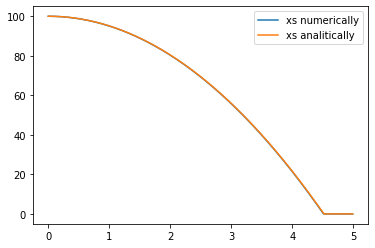

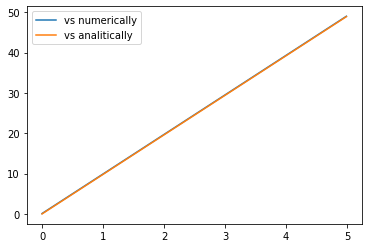

In [22]:
delta_t = 0.01
ts = np.arange(0, 5, delta_t)
xs = list(); vs = list()
x_start = 100; v_start = 0
x_temp = x_start; v_temp = v_start
for t in ts:
    x_temp = x_temp - v_temp*delta_t
    if(x_temp <= 0): 
        x_temp = 0
    v_temp = v_temp + g*delta_t
    xs.append(x_temp)
    vs.append(v_temp)
    

x_ex = x_exact(ts, x_start)
x_exc =  [x*(x>=0) for x in x_ex]
v_exc = v_exact(ts, v_start)
    
plt.plot(ts, xs, label='xs numerically')
plt.plot(ts, x_exc, label='xs analitically')
plt.legend()
plt.show()

plt.plot(ts, vs, label='vs numerically')
plt.plot(ts, v_exc, label='vs analitically')
plt.legend()
plt.show()

# Free Fall into water

In [74]:
def check_x(xs):
    return [x if x>=-L else -L for x in xs]

def x_exact_water(t, x_0):
    return check_x(x_0 - (g*t**2)/2)
    
def v_exact_water(t, v_0=0):
    return g*t+v_0

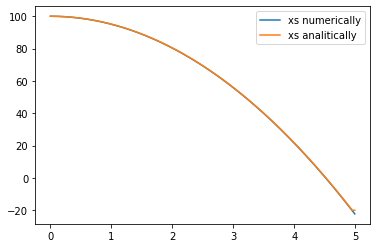

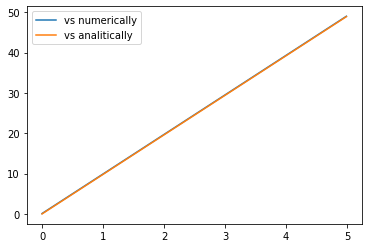

In [75]:
L = 20 # depth of the water
Fb = 5 # constant buoyant force
g = 9.8
ts = np.arange(0, 5, delta_t)
xs = list(); vs = list()
x_start = 100; v_start = 0
x_temp = x_start; v_temp = v_start

for t in ts:
    x_temp = x_temp - v_temp*delta_t
    if(x_temp <= 0): 
        
        ### TODO: add water resistance
        
        if(x_temp <= -L): L
    v_temp = v_temp + g*delta_t
    xs.append(x_temp)
    vs.append(v_temp)
    

x_exc = x_exact_water(ts, x_start)
v_exc = v_exact_water(ts, v_start)
    
plt.plot(ts, xs, label='xs numerically')
plt.plot(ts, x_exc, label='xs analitically')
plt.legend()
plt.show()

plt.plot(ts, vs, label='vs numerically')
plt.plot(ts, v_exc, label='vs analitically')
plt.legend()
plt.show()

# Pendulum

In [52]:
def pendulum_euler_cromer(omega_0, theta_0, g, l, delta_t):
    omega_1 = omega_0 - (g/l)*np.sin(theta_0)*delta_t
    theta_1 = theta_0 + omega_1*delta_t
    return omega_1, theta_1

def pendulum_euler(omega_0, theta_0, g, l, delta_t):
    omega_1 = omega_0 - (g/l)*np.sin(theta_0)*delta_t
    theta_1 = theta_0 + omega_0*delta_t
    return omega_1, theta_1

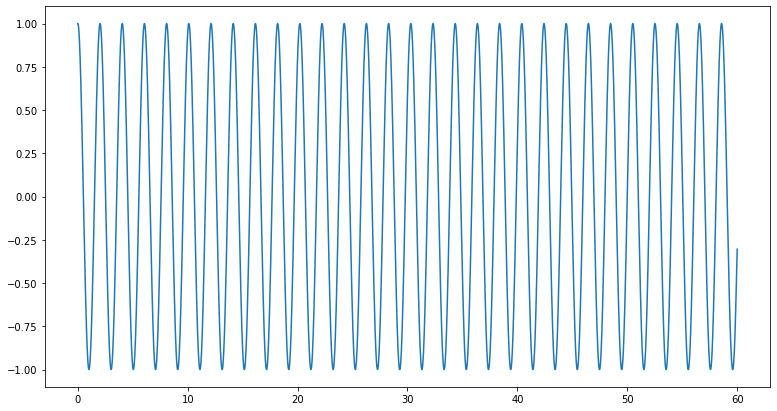

In [64]:
l = 1
delta_t = 0.01
ts = np.arange(0, 60, delta_t)
g = 9.8
omegas = np.zeros(len(ts) + 1)
thetas = np.zeros(len(ts) + 1)
omegas[0] = 1
thetas[0] = 0

for t in range(len(ts)):
    omegas[t+1], thetas[t+1] = pendulum_euler_cromer(omegas[t], thetas[t], g, l, delta_t)
    
ts = np.append(ts, 60+delta_t)
fig = plt.figure(figsize=(13,7))
plt.plot(ts, omegas)
plt.show()

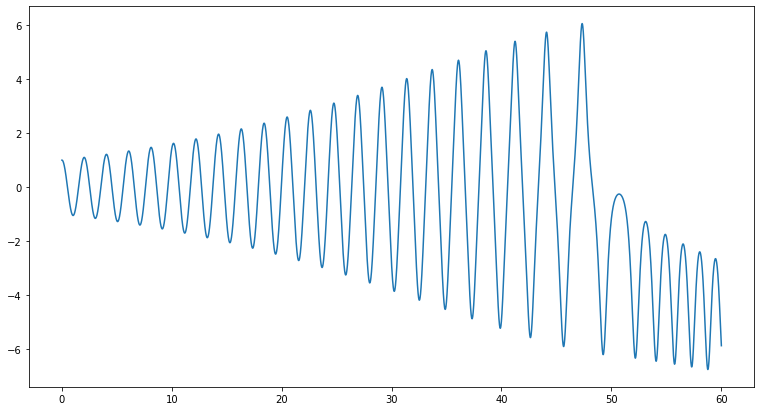

In [65]:
l = 1
delta_t = 0.01
ts = np.arange(0, 60, delta_t)
g = 9.8
omegas = np.zeros(len(ts) + 1)
thetas = np.zeros(len(ts) + 1)
omegas[0] = 1
thetas[0] = 0

for t in range(len(ts)):
    omegas[t+1], thetas[t+1] = pendulum_euler(omegas[t], thetas[t], g, l, delta_t)
    
ts = np.append(ts, 60+delta_t)
fig = plt.figure(figsize=(13,7))
plt.plot(ts, omegas)
plt.show()